In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pycountry

In [2]:
with open("Sources/daily_data_by_country.csv") as f:
    daily_data = pd.read_csv(f,  error_bad_lines=False)

with open("Sources/data_by_country/HEALTH_LVNG_26042020095720197.csv") as f:
    OECD_countries_data = pd.read_csv(f, error_bad_lines=False)

In [5]:
#making the list of OECD countries & searching the last day when data have been collected
OECD_countries = list(set(OECD_countries_data['Country']))
OECD_countries.sort()
last_day_nb = daily_data.values[-1, 0]

In [7]:
#try to cluster the OECD countries members by regarding their last daily death rate and recovered rate
tested_countries = OECD_countries
last_day_data = daily_data.loc[(daily_data['Country'].isin(tested_countries)) & (daily_data['Day_number']==last_day_nb) & (daily_data['Death_rate']!=np.nan) & (daily_data['Recovery_rate']!=np.nan), ['Country', 'Death_rate', 'Recovery_rate']].groupby('Country').mean()
scaled_data = preprocessing.scale(last_day_data)

#some OECD countries members have not yet death or recovered from Covid-19
tested_countries = last_day_data.index

In [8]:
#implementing the PCA objet for PCA Analysis
pca = PCA()

#training on the scaled_data
pca.fit(scaled_data)

#building of the 2 principal components in this case
pca_data = pca.transform(scaled_data)

#use of the two components to cluster the data
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

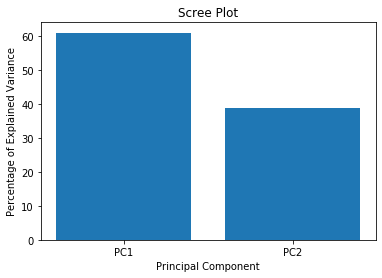

In [9]:
#the scree shot represents the percentage of variation that each principal component accounts for
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

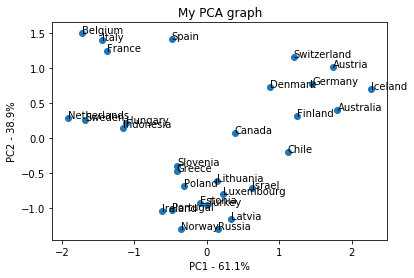

In [10]:
pca_df = pd.DataFrame(pca_data, index=tested_countries, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))


for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))